# Overview

Climate change has increased the likelihood of a variety of extreme weather events, including wildfires. These wildfires pose risks to both human and ecological communities. Thus, our project will ultilize different machine learning models to better understand forest fires in two different areas: Algeria and Portugal. 

First, we want to predict the area of different forest fires occurring in Portugal by selecting a machine learning model and applying it to a dataset taken from University of California Irvine. Second, we will train on a different dataset detailing fires in Algeria to predict the likelihood of fires occurring. Then, we hope to use the models trained on these datasets to create a map of areas at-risk of forest fires in the United States.

# The Datasets

Below are the datasets that will be used in this project. These were taken from the Univeristy of California Irvine Machine Learning Repository. Our first dataset, the Algerian Forest Fires Dataset, contains fire and non-fire events with 11 attributes that describe weather characteristics at the time of that event. Our second dataset, the Forest Fires Dataset, contains data from Montesinho National Park, Portugal. This dataset contains many of the same weather characteristics as the Algerian dataset, but has only fire events. Rather than using this dataset to predict whether a fire occurred in a given area, it can be used to predict the size of a fire. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectFromModel


In [ ]:
algeria_url = 'https://raw.githubusercontent.com/ebwieman/wildfire-risk-tool/main/Algerian_forest_fires_dataset.csv'
portugal_url = 'https://raw.githubusercontent.com/ebwieman/wildfire-risk-tool/main/forestfires.csv'

algeria_df = pd.read_csv(algeria_url)
portugal_df = pd.read_csv(portugal_url)

# Data Preparation

## The Algeria Dataset:

This dataset includes 244 instances that regrouped data from two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria. There are 122 instances for each region. This data was collected from June 2012 to September 2012. The dataset contains fire and non-fire events with 13 attributes that describe weather characteristics at the time of that event. 

Before training the dataset on our machine learning models, we will clean up some of the data. To do this, we'll convert the target label "Fire" into binary numbers. We use “one-hot encoding” to achieve this, in which each category is represented by a binary column, with a 1 indicating that the a forest fire occured given the conditions. In addition, we will remove any rows with missing data. 

In [ ]:
algeria_df['Classes'] = algeria_df['Classes'].str.strip()
algeria_df.drop(algeria_df[(algeria_df['Classes'] != 'fire') & (algeria_df['Classes'] != 'not fire')].index, inplace=True)
algeria_df['Classes'].unique()

algeria_df['Classes'].replace(('not fire', 'fire'),(0,1),inplace = True)
algeria_df.rename(columns = {'Classes': 'Fire'},inplace = True)
algeria_df['Fire'].unique()

algeria_df = algeria_df.astype(float)
algeria_df = pd.get_dummies(algeria_df)
algeria_df.dropna(axis = 0)

algeria_df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Fire
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
243,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0
244,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0
245,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0


There are a total of 13 features: day, month, year, temperature in Celsius, relative humidity, wind speed, rain, fine fuel moisture code, duff moisture code, drought code, initial speed index, build up index, and fire weather index. Our target label is "fire", classifying wether or not a forest fire occured given the conditions.

## The Portugal Dataset:

The data collected in this dataset was taken from Montesino park in the northeast region of Portugal. This dataset contains many of the same weather characteristics as the Algerian dataset, but contains only fire events.  Rather than using this dataset to predict whether a fire occurred in a given area, it can be used to predict the size of a fire. We will perform the same cleanup for the Portugal dataset using the Pandas function get_dummies(). 


In [ ]:
portugal_df = pd.get_dummies(portugal_df)

portugal_df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0


There are 12 features:  x-axis spatial coordinate, y-axis spatial coordinate, month, day, fine fuel moisture code, duff moisture code, drought code, initial speed index, temperature in Celsius, relative humidity, wind, and rain. Our target label is "fire area", which determines the total burned area of the fire given the conditions. 

# Split data into test and training data

Sometimes, the accuracy score on the training data is not always a reliable guide to evaluate the ability of the model to make predictions on unseen data. For this reason, we are going to hold back a testing data set until we’re ready to evaluate our model. We will split both our Algeria and Portugal datasets into training and testing data. Both datasets will be split by 80-20, with 20% making up the testing data. 

## Training data for Algeria:

In [ ]:
alg_train, alg_test = train_test_split(algeria_df, test_size=0.2, random_state=25)

alg_train

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Fire
105,14.0,9.0,2012.0,22.0,76.0,26.0,8.3,47.4,1.1,7.0,0.4,1.6,0.1,0.0
96,5.0,9.0,2012.0,29.0,75.0,16.0,0.0,80.8,3.4,24.0,2.8,5.1,1.7,1.0
91,31.0,8.0,2012.0,28.0,80.0,21.0,16.8,52.5,8.7,8.7,0.6,8.3,0.3,0.0
78,18.0,8.0,2012.0,36.0,54.0,18.0,0.0,89.4,20.0,110.9,9.7,27.5,16.1,1.0
32,3.0,7.0,2012.0,32.0,76.0,20.0,0.7,63.1,2.6,9.2,1.3,3.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1.0,8.0,2012.0,36.0,45.0,14.0,0.0,78.8,4.8,10.2,2.0,4.7,0.9,0.0
146,22.0,6.0,2012.0,33.0,46.0,14.0,1.1,78.3,8.1,8.3,1.9,7.7,1.2,0.0
222,6.0,9.0,2012.0,34.0,71.0,14.0,6.5,64.5,3.3,9.1,1.0,3.5,0.4,0.0
62,2.0,8.0,2012.0,35.0,55.0,12.0,0.4,78.0,5.8,10.0,1.7,5.5,0.8,0.0


In [ ]:
y_train_algeria = alg_train["Fire"]
y_test_algeria = alg_test["Fire"]

X_train_algeria = alg_train.drop(["Fire"], axis=1)
X_test_algeria = alg_test.drop(["Fire"], axis=1)

## Training data for Portugal:

In [ ]:
portugal_train, portugal_test = train_test_split(portugal_df, test_size=0.2, random_state=25)
portugal_df[portugal_df["area"]==0.00]

portugal_train

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
250,8,5,93.1,157.3,666.7,13.5,26.8,25,3.1,0.0,...,0,0,0,0,0,0,0,0,0,1
48,4,4,87.2,23.9,64.7,4.1,11.8,35,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
417,6,5,93.4,17.3,28.3,9.9,13.8,24,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
140,2,5,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,...,0,0,1,0,1,0,0,0,0,0
96,3,4,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,4,4,92.4,96.2,739.4,8.6,19.2,24,4.9,0.0,...,0,0,1,0,0,0,0,1,0,0
143,1,2,90.0,51.3,296.3,8.7,16.6,53,5.4,0.0,...,0,0,0,0,0,1,0,0,0,0
474,4,3,93.0,103.8,316.7,10.8,26.4,35,2.7,0.0,...,0,0,0,0,0,0,0,1,0,0
318,6,5,92.8,119.0,783.5,7.5,21.6,27,2.2,0.0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
y_train_portugal = portugal_train["area"]
y_test_portugal = portugal_test["area"]

X_train_portugal = portugal_train.drop(["area"], axis=1)
X_test_portugal = portugal_test.drop(["area"], axis=1)

# Choosing important features

We will use RidgeCV from scikit learn to pull out some important features in each dataset that we can later use to train on. RidgeCV is a cross validation method in ridge regression. The features with the highest absolute coefficient are conisdered the most important features. 

## Portugal's important features:

After applying RidgeCV to the Portugal dataset, we yield the 5 most important features: X, Y, ISI, temp, and wind. We will then plot these features against the target label, "Fire Area", to see their relationship to one another. In each scatterplot, the x-axis represents the important feature and the y-axis shows the amount of burned area given that feature.

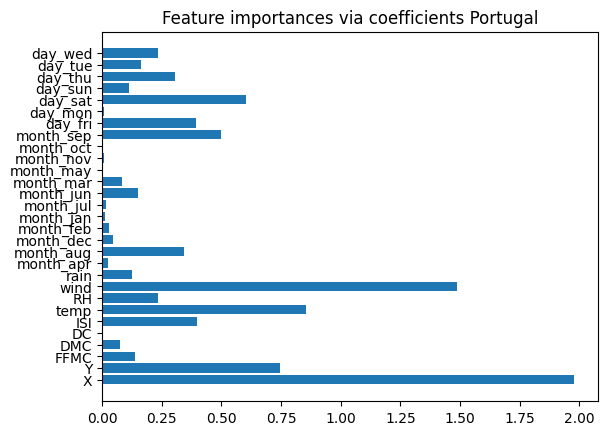

Features selected: ['X' 'Y' 'ISI' 'temp' 'wind']


In [ ]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train_portugal, y_train_portugal) 

#assign importance to each feature through a specific attribute
importance = np.abs(ridge.coef_)           

#create a plot to visualize the importance of the features
feature_names = np.array(X_train_portugal.columns)
plt.barh(feature_names, importance)
plt.title("Feature importances via coefficients Portugal")
plt.show()

#select a certain number of features
threshold = np.sort(importance)[-10]
sfm = SelectFromModel(ridge, threshold=threshold).fit(X_train_portugal, y_train_portugal)

#only select the first five features from the list
selected_features_portugal = feature_names[sfm.get_support()][0:5]

print(f"Features selected: {selected_features_portugal}")

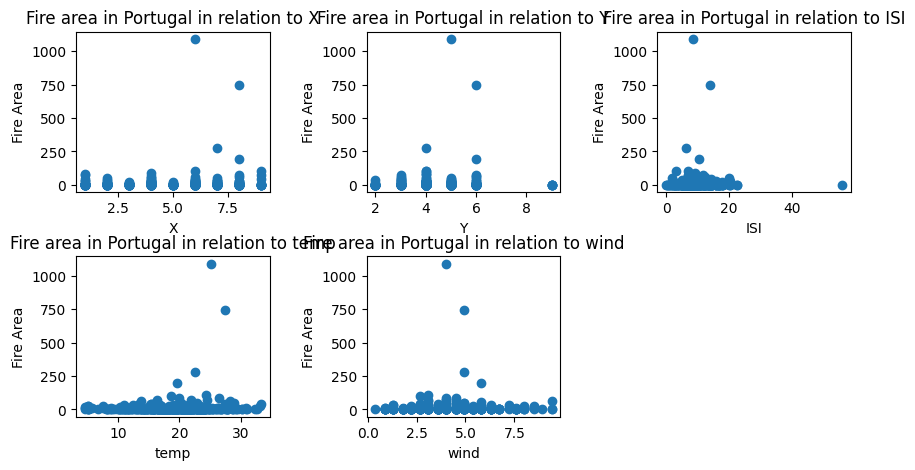

In [ ]:
fig, axarr = plt.subplots(2, 3, figsize = (10, 5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.4)
fig.delaxes(ax = axarr[1,2])

for i in range(5):
  ax = axarr.flatten()
  ax[i].scatter(X_train_portugal[selected_features_portugal[i]], y_train_portugal)
  ax[i].set(ylabel = "Fire Area", xlabel = selected_features_portugal[i], title = (f"Fire area in Portugal in relation to {selected_features_portugal[i]}"))

## Algeria's important features:

We apply the same technique to the Algeria dataset, and the 5 most important features are: RH, Rain, FFMC, ISI, and FWI. We will also plot these features against the target label, "Fire", to see their relationship to one another. Since this target label is binary, "no fire" or "fire, we opted for box plots to have better visualization. 

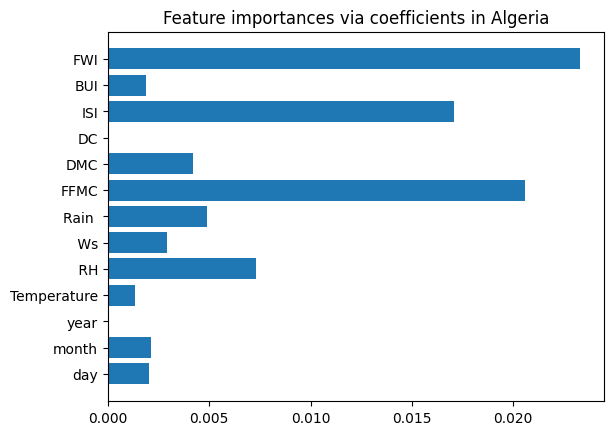

Features selected by SelectFromModel: [' RH' 'Rain ' 'FFMC' 'ISI' 'FWI']


In [ ]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train_algeria, y_train_algeria) 

#assign importance to each feature through a specific attribute
importance = np.abs(ridge.coef_)

#create a plot to visualize the importance of the features
feature_names = np.array(X_train_algeria.columns)
plt.barh(feature_names, importance)
plt.title("Feature importances via coefficients in Algeria")
plt.show()

#select a certain number of features
threshold = np.sort(importance)[-5]

sfm = SelectFromModel(ridge, threshold=threshold).fit(X_train_algeria, y_train_algeria)
#only select the first three features from the list
selected_features_algeria = feature_names[sfm.get_support()][0:5]

print(f"Features selected by SelectFromModel: {selected_features_algeria}")

[Text(0.5, 1.0, 'FWI')]

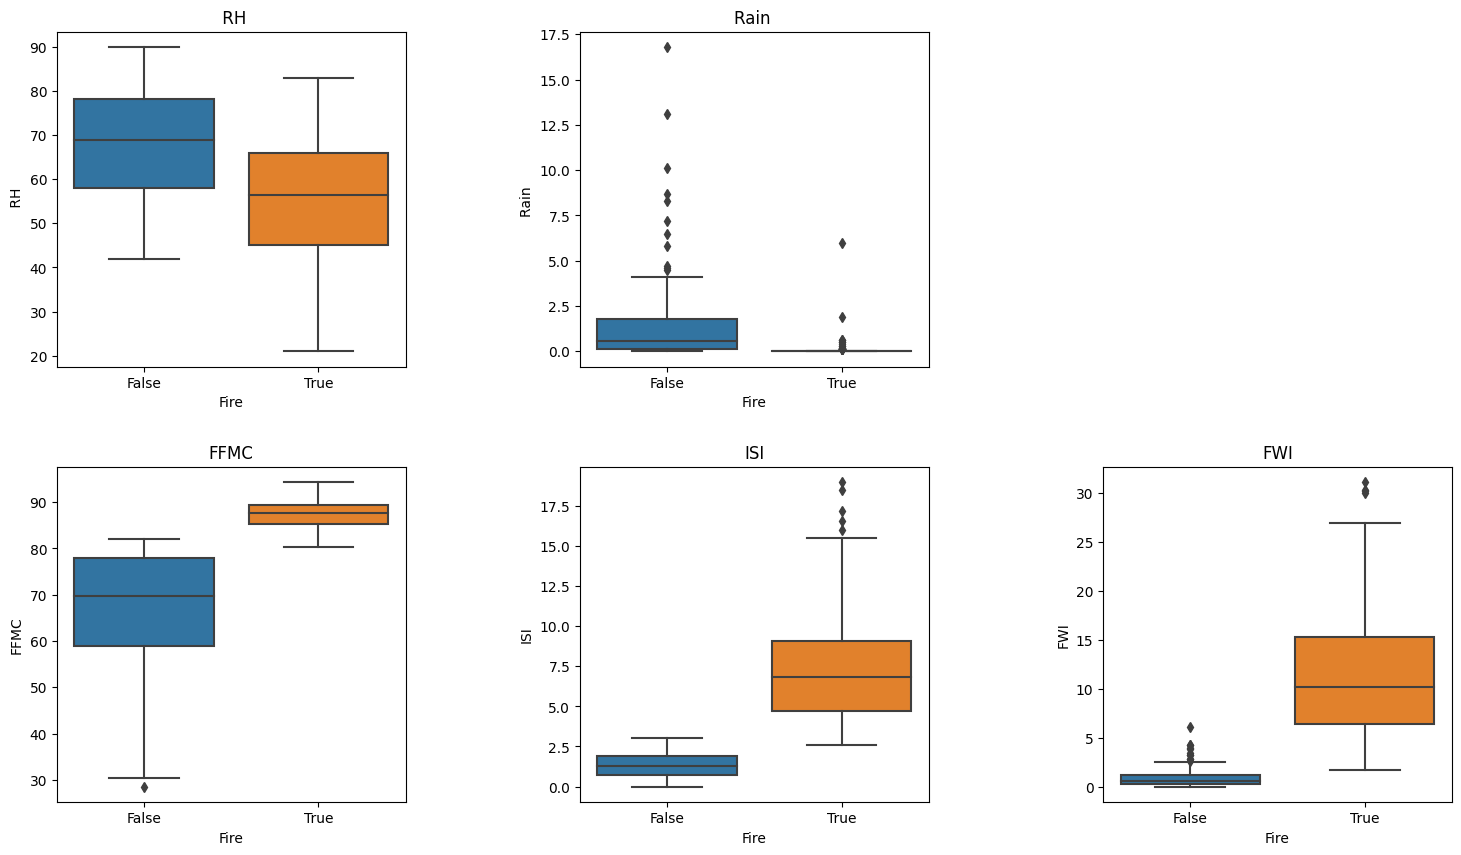

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(2,3, figsize=(18, 10))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)

sns.boxplot(ax=axes[0,0], x = y_train_algeria == 1,y=X_train_algeria[selected_features_algeria[0]])
sns.boxplot(ax=axes[0,1], x = y_train_algeria == 1,y=X_train_algeria[selected_features_algeria[1]])
sns.boxplot(ax=axes[1,0], x = y_train_algeria == 1,y=X_train_algeria[selected_features_algeria[2]])
sns.boxplot(ax=axes[1,1], x = y_train_algeria == 1,y=X_train_algeria[selected_features_algeria[3]])
sns.boxplot(ax=axes[1,2], x = y_train_algeria == 1,y=X_train_algeria[selected_features_algeria[4]])

fig.delaxes(ax=axes[0,2])

axes[0,0].set(title = selected_features_algeria[0])
axes[0,1].set(title = selected_features_algeria[1])
axes[1,0].set(title = selected_features_algeria[2])
axes[1,1].set(title = selected_features_algeria[3])
axes[1,2].set(title = selected_features_algeria[4])


# Modeling

We are now ready to model on the Algeria and Portugal training data. For each training dataset, we will train on the completed set of features and the 5 selected features we have gotten from RidgeCV. Rather than developing our own algorithms, we are planning on using existing models such as Random Forest and Logistic Regression and spending our time focusing on model and feature selection. We will choose the model and set of features that yield the highest acurracy score. All of the machine learning algorithms that we will use are imported from scikit learn. 


## Training on Algeria dataset:

We will train the algeria data on 4 different classifiers: 
1. Decision Tree 
2. Logistic Regression
3. Random Forest 
4. Stochastic Gradient Descent 

Again, we will train the Algeria with its completed set of features and with its 5 slected features. The 5 selected features are: RH, Rain, FFMC, ISI, and FWI. In addition, we will use cross validation to evaluate each model's performance at different settings and avoid overfitting. 

### Decision tree classifier on Algeria data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

max_depth = 5           #iterator for selected features
max_depthC = 5          #iterator for complete features

best_score_DT = 0       #keeping track of highest accuracy for selected features
best_score_DTC = 0      #keeping track of highest accuracy for complete features

print("Training on selected features.")

#train on decision tree classifier using selected features
while max_depth != 0:
    DT_algeria = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=max_depth))
    DT_algeria.fit(X_train_algeria[selected_features_algeria], y_train_algeria)

    cv_scores = cross_val_score(DT_algeria, X_train_algeria[selected_features_algeria], y_train_algeria, cv=5)
    mean_score = cv_scores.mean()
    print(f"Max depth = {max_depth}, score = {mean_score.round(3)}")

    #keeping the list of columns for the max_depth with the best score 
    if (DT_algeria.score(X_train_algeria[selected_features_algeria], y_train_algeria) > best_score_DT):
        best_score_DT = DT_algeria.score(X_train_algeria[selected_features_algeria], y_train_algeria)
        best_DT = DT_algeria
        best_max_depth = max_depth
    
    max_depth += -1

print("\n\n")
print("Training on all features.")

#train on decision tree classifier using all features
while max_depthC != 0:
    DT_algeria_complete = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=max_depthC))
    DT_algeria_complete.fit(X_train_algeria, y_train_algeria)
    
    cv_scores = cross_val_score(DT_algeria_complete, X_train_algeria, y_train_algeria, cv=5)
    mean_score = cv_scores.mean()
    print(f"Max depth = {max_depthC}, score = {mean_score.round(3)}")

    #keeping the list of columns for the max_depth with the best score 
    if (DT_algeria_complete.score(X_train_algeria, y_train_algeria) > best_score_DTC):
        best_score_DTC = DT_algeria_complete.score(X_train_algeria, y_train_algeria)
        best_DTC = DT_algeria_complete
        best_max_depth = max_depthC
    
    max_depthC += -1

Training on selected features.
Max depth = 5, score = 0.974
Max depth = 4, score = 0.974
Max depth = 3, score = 0.979
Max depth = 2, score = 0.979
Max depth = 1, score = 0.974



Training on all features.
Max depth = 5, score = 0.974
Max depth = 4, score = 0.969
Max depth = 3, score = 0.979
Max depth = 2, score = 0.979
Max depth = 1, score = 0.969


### Logistic regression classifier on Algeria

In [ ]:
from sklearn.linear_model import LogisticRegression

#train on selected features via logistic regression
LR_algeria = LogisticRegression()
LR_algeria.fit(X_train_algeria[selected_features_algeria], y_train_algeria)

print(f"Training Accuracy for LR using selected features: {LR_algeria.score(X_train_algeria[selected_features_algeria], y_train_algeria)}")

#train on complete dataset
LR_algeria_complete = LogisticRegression()
LR_algeria_complete.fit(X_train_algeria, y_train_algeria)

print(f"\nTraining Accuracy for LR using all features: {LR_algeria_complete.score(X_train_algeria, y_train_algeria)}\n")


Training Accuracy for LR using selected features: 0.9742268041237113

Training Accuracy for LR using all features: 0.9896907216494846



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random forest classifier on Algeria

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_depth = 5           #iterator for selected features
max_depthC = 5          #iterator for complete features

best_score_RF = 0       #keeping track of highest accuracy for selected features
best_score_RFC = 0      #keeping track of highest accuracy for complete features

print("Training on selected features.")

#train on random forest classifier using selected features
while max_depth != 0:
    RF_algeria = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=max_depth, random_state=0))
    RF_algeria.fit(X_train_algeria[selected_features_algeria], y_train_algeria)

    cv_scores_RF_algeria = cross_val_score(RF_algeria, X_train_algeria[selected_features_algeria], y_train_algeria, cv=5)
    mean_score = cv_scores_RF_algeria.mean()
    print(f"Max depth = {max_depth}, score = {mean_score.round(3)}")

    #keeping the list of columns for the max_depth with the best score 
    if (RF_algeria.score(X_train_algeria[selected_features_algeria], y_train_algeria) > best_score_RF):
        best_score_RF = RF_algeria.score(X_train_algeria[selected_features_algeria], y_train_algeria)
        best_RF = RF_algeria
        best_max_depth = max_depth
    
    max_depth += -1
  
print("\n\n")
print("Training on all features.")

#train on random forest classifier using all features
while max_depthC != 0:
    RF_algeria_complete = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=max_depthC, random_state=0))
    RF_algeria_complete.fit(X_train_algeria, y_train_algeria)
    
    cv_scores_RF_algeria_complete = cross_val_score(RF_algeria_complete, X_train_algeria, y_train_algeria, cv=5)
    mean_score = cv_scores_RF_algeria_complete.mean()
    print(f"Max depth = {max_depthC}, score = {mean_score.round(3)}")

    # keeping the list of columns for the max_depth with the best score 
    if (RF_algeria_complete.score(X_train_algeria, y_train_algeria) > best_score_RFC):
        best_score_RFC = RF_algeria_complete.score(X_train_algeria, y_train_algeria)
        best_RFC = RF_algeria_complete
        best_max_depth = max_depthC
    
    max_depthC += -1

Training on selected features.
Max depth = 5, score = 0.974
Max depth = 4, score = 0.974
Max depth = 3, score = 0.974
Max depth = 2, score = 0.974
Max depth = 1, score = 0.974



Training on all features.
Max depth = 5, score = 0.974
Max depth = 4, score = 0.974
Max depth = 3, score = 0.974
Max depth = 2, score = 0.974
Max depth = 1, score = 0.943


### Stochastic gradient descent on Algeria

In [ ]:
from sklearn.linear_model import SGDClassifier

SGD_algeria = SGDClassifier(loss="hinge", penalty="l2", max_iter=10)
SGD_algeria.fit(X_train_algeria[selected_features_algeria], y_train_algeria)

print(f"Training Accuracy for SGD using selected features: {SGD_algeria.score(X_train_algeria[selected_features_algeria], y_train_algeria)}")

SGD_algeria_complete = SGDClassifier(loss="hinge", penalty="l2", max_iter=10)
SGD_algeria_complete.fit(X_train_algeria, y_train_algeria)

print(f"\nTraining Accuracy for SGD using all features: {SGD_algeria_complete.score(X_train_algeria, y_train_algeria)} \n")



Training Accuracy for SGD using selected features: 0.8556701030927835

Training Accuracy for SGD using all features: 0.5567010309278351 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## Training on Portugal dataset:

We will train the algeria data on 4 different classifiers: 
1. Linear Regression
2. Logistic Regression 
3. Support Vector Classification
4. Epsilon-Support Vector Regression

Here, we will train the models on Portugal's 5 slected features from RidgeCV, features highlighted by the paper, and it's complete set of features. The 5 selected features from RidgeCV are:  X, Y, ISI, temp, and wind. The features highlighted by the paper are: temp, RH, rain, and wind.

We will also perform transformations on our target label to improve the models' accuracy. We transformed our target labels to log, binary, range, and categorical values. 

In addition, we will use cross validation to evaluate each model's performance at different settings and avoid overfitting. 



In [ ]:
from sklearn import preprocessing
from sklearn import utils

#fetures highlighted by paper
papers_features = ["temp", "RH", "rain", "wind"]


#convert labels to categorical values
lab = preprocessing.LabelEncoder()
y_train_transformed = lab.fit_transform(y_train_portugal)

In [ ]:
# make a copy of df and change labels to 0 and non 0s (binary)
portugal_df_copy = portugal_df.copy()
portugal_df_copy.loc[portugal_df_copy["area"] > 0.0] = 1
portugal_df_copy.loc[portugal_df_copy["area"] <= 0.0] = 0

portugal_train_binary, portugal_test_binary = train_test_split(portugal_df_copy, test_size=0.2, random_state=25)

y_train_portugal_binary = portugal_train_binary["area"]
y_test_portugal_binary = portugal_test_binary["area"]

X_train_portugal_binary = portugal_train_binary.drop(["area"], axis=1)
X_test_portugal_binary = portugal_test_binary.drop(["area"], axis=1)



In [ ]:
# make a copy of df and change labels to a range
portugal_df_copy2 = portugal_df.copy()

print(portugal_df_copy2["area"].max())
ranges = portugal_df_copy2["area"].max()  / 50

portugal_df_copy2.loc[portugal_df_copy2["area"] <= 0.0] = 0.0

for i in range(50):
  portugal_df_copy2.loc[(portugal_df_copy2["area"] > (ranges * i)) & (portugal_df_copy2["area"] <= ranges * (i+1))] = ranges * (i+1)

portugal_train_range, portugal_test_range = train_test_split(portugal_df_copy2, test_size=0.2, random_state=25)

y_train_portugal_range = portugal_train_range["area"]
y_test_portugal_range = portugal_test_range["area"]

X_train_portugal_range = portugal_train_range.drop(["area"], axis=1)
X_test_portugal_range = portugal_test_range.drop(["area"], axis=1)

1090.84


### Linear regression classifier on Portugal 

In [ ]:
from sklearn.linear_model import LinearRegression

#train on non-transformed y
LinR_portugal = LinearRegression()
LinR_portugal.fit(X_train_portugal, y_train_portugal)

print("Training Accuracy for linear regression: " + str(LinR_portugal.score(X_train_portugal, y_train_portugal)))

Training Accuracy for linear regression: 0.04793115962477279


In [ ]:
#train on y-train that was split into 50 ranges
LinR_portugal = LinearRegression()
LinR_portugal.fit(X_train_portugal_range, y_train_portugal_range)

print("Training Accuracy for linear regression: " + str(LinR_portugal.score(X_train_portugal_range, y_train_portugal_range)))

Training Accuracy for linear regression: 1.0


In [ ]:
#train on y transformed into binary labels
LinR_portugal_complete_binary = LinearRegression()
LinR_portugal_complete_binary.fit(X_train_portugal_binary, y_train_portugal_binary)

print("Training Accuracy for linear regression: " + str(LinR_portugal_complete_binary.score(X_train_portugal_binary, y_train_portugal_binary)))

Training Accuracy for linear regression: 1.0


In [ ]:
#train on y transformed into categorical values

#train on paper's features
LinR_portugal_paper = LinearRegression()
LinR_portugal_paper.fit(X_train_portugal[papers_features], y_train_transformed)

cv_scores_portugal = cross_val_score(LinR_portugal_paper, X_train_portugal[papers_features], y_train_transformed, cv=5)

print(f"Cross val scores for features highlited by paper: {cv_scores_portugal}")
print("Training Accuracy for linear regression: " + str(LinR_portugal_paper.score(X_train_portugal[papers_features], y_train_transformed)))


#train on all features
LinR_portugal_complete = LinearRegression()
LinR_portugal_complete.fit(X_train_portugal, y_train_transformed)

cv_scores_portugal = cross_val_score(LinR_portugal_complete, X_train_portugal, y_train_transformed, cv=5)

print(f"\nCross val scores for all features: {cv_scores_portugal}")
print("Training Accuracy for linear regression: " + str(LinR_portugal_complete.score(X_train_portugal, y_train_transformed)))


#train on featured selected by RidgeCV
LinR_portugal_selected = LinearRegression()
LinR_portugal_selected.fit(X_train_portugal[selected_features_portugal], y_train_transformed)

cv_scores_portugal = cross_val_score(LinR_portugal_selected, X_train_portugal[selected_features_portugal], y_train_transformed, cv=5)

print(f"\nCross val scores for features selected by RidgeCV: {cv_scores_portugal}")
print("Training Accuracy for linear regression: " + str(LinR_portugal_selected.score(X_train_portugal[selected_features_portugal], y_train_transformed)))


Cross val scores for features highlited by paper: [ 0.01875518 -0.03799198 -0.01599223 -0.97997841 -0.01931605]
Training Accuracy for linear regression: 0.014415847547068927

Cross val scores for all features: [ 0.02493997 -0.06590393 -0.06223167 -1.37012855 -0.21533972]
Training Accuracy for linear regression: 0.07364043558950595

Cross val scores for features selected by RidgeCV: [ 0.01855795 -0.05131269 -0.02041167  0.00572244 -0.11218235]
Training Accuracy for linear regression: 0.021379727090125145


## Logistic Regression on Portugal

In [ ]:
#train on paper's features and using binary labels 
LogR_portugal_binary = LogisticRegression()
LogR_portugal_binary.fit(X_train_portugal_binary, y_train_portugal_binary)

print(f"\nTraining Accuracy for logistic regression: {LogR_portugal_binary.score(X_train_portugal_binary, y_train_portugal_binary)}")


Training Accuracy for logistic regression: 1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
#train on y transformed into categorical values

#train on paper's features
LogR_portugal_paper = LogisticRegression()
LogR_portugal_paper.fit(X_train_portugal[papers_features], y_train_transformed)

print(f"\nTraining Accuracy for logistic regression using features highlighted by the paper: {LogR_portugal_paper.score(X_train_portugal[papers_features], y_train_transformed)}\n")

#train on complete dataset
LogR_portugal_complete = LogisticRegression()
LogR_portugal_complete.fit(X_train_portugal, y_train_transformed)

print(f"\nTraining Accuracy for logistic regression using all features: {LogR_portugal_complete.score(X_train_portugal, y_train_transformed)}\n")

#train on features selected by RidgeCV
LogR_portugal_selected = LogisticRegression()
LogR_portugal_selected.fit(X_train_portugal[selected_features_portugal], y_train_transformed)

print(f"\nTraining Accuracy for logistic regression using features selected by RidgeCV: {LogR_portugal_selected.score(X_train_portugal[selected_features_portugal], y_train_transformed)}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Training Accuracy for logistic regression using features highlighted by the paper: 0.48184019370460046



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Training Accuracy for logistic regression using all features: 0.46246973365617433


Training Accuracy for logistic regression using features selected by RidgeCV: 0.513317191283293



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Support Vector Classifcation on Portugal

In [ ]:
from sklearn import svm
#train on y transformed into categorical values

#train on paper's features
SVC_portugal_paper = svm.SVC(kernel='poly', degree=3)
SVC_portugal_paper.fit(X_train_portugal[papers_features], y_train_transformed)
print(f"\nTraining Accuracy for SVC using features highlighted from the paper: {SVC_portugal_paper.score(X_train_portugal[papers_features], y_train_transformed)}")

#train on all features
SVC_portugal_complete = svm.SVC(kernel='poly', degree=3)
SVC_portugal_complete.fit(X_train_portugal, y_train_transformed)
print(f"\nTraining Accuracy for SVC using all features: {SVC_portugal_complete.score(X_train_portugal, y_train_transformed)}")

#train on features selected by RidgeCV
SVC_portugal_selected = svm.SVC(kernel='poly', degree=3)
SVC_portugal_selected.fit(X_train_portugal[selected_features_portugal], y_train_transformed)
print(f"\nTraining Accuracy for SVC using features selected by RidgeCV: {SVC_portugal_selected.score(X_train_portugal[selected_features_portugal], y_train_transformed)}")


Training Accuracy for SVC using features highlighted from the paper: 0.48184019370460046

Training Accuracy for SVC using all features: 0.4794188861985472

Training Accuracy for SVC using features selected by RidgeCV: 0.49878934624697335


### SVR on Portugal

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

#training on y transformed gave worst accuracy, so we went ahead and trained on the original y labels

#train on paper's features
SVR_portugal_paper = make_pipeline(StandardScaler(), SVR(gamma='auto'))
SVR_portugal_paper.fit(X_train_portugal[papers_features], y_train_portugal)

cv_scores_SVR = cross_val_score(SVR_portugal_paper, X_train_portugal[papers_features], y_train_portugal, cv=5)

print(f"Cross val scores for selected features: {cv_scores_SVR}")
print("Training Accuracy for SVC: " + str(SVR_portugal_paper.score(X_train_portugal[papers_features], y_train_portugal)))

#train on all features
SVR_portugal_complete = make_pipeline(StandardScaler(), SVR(gamma='auto'))
SVR_portugal_complete.fit(X_train_portugal, y_train_portugal)

cv_scores_SVR = cross_val_score(SVR_portugal_complete, X_train_portugal, y_train_portugal, cv=5)

print(f"\nCross val scores for all features: {cv_scores_SVR}")
print("Training Accuracy for SVC: " + str(SVR_portugal_complete.score(X_train_portugal, y_train_portugal)))

#train on features selected by RidgeCV
SVR_portugal_selected = make_pipeline(StandardScaler(), SVR(gamma='auto'))
SVR_portugal_selected.fit(X_train_portugal[selected_features_portugal], y_train_portugal)

cv_scores_SVR = cross_val_score(SVR_portugal_selected, X_train_portugal[selected_features_portugal], y_train_portugal, cv=5)

print(f"\nCross val scores for features selected by RidgeCV: {cv_scores_SVR}")
print("Training Accuracy for SVC: " + str(SVR_portugal_selected.score(X_train_portugal[selected_features_portugal], y_train_portugal)))

Cross val scores for selected features: [-0.02603315 -0.16955323 -0.20086096 -0.17891782 -0.03004511]
Training Accuracy for SVC: -0.026964073944544698

Cross val scores for all features: [-0.02601154 -0.16531766 -0.20141533 -0.16730645 -0.03065345]
Training Accuracy for SVC: -0.0259967252082014

Cross val scores for features selected by RidgeCV: [-0.02547019 -0.14594411 -0.18518067 -0.14792468 -0.03294225]
Training Accuracy for SVC: -0.02569288926430735


### Log-transform then fit again 

We'll log-transform the values and then train the models on them again to see if this yields better accuracy.

In [ ]:
#log-transform target labels
y_train_log_transformed = np.log(y_train_portugal+1)

#using linear regression to train on log-transformed y

#paper's features
LinR_portugal_paper_log = LinearRegression()
LinR_portugal_paper_log.fit(X_train_portugal[papers_features], y_train_log_transformed)

predictions = LinR_portugal_paper_log.predict(X_train_portugal[papers_features])
predictions_transformed = np.exp(predictions) - 1

u = ((y_train_portugal - predictions_transformed)** 2).sum()
v = ((y_train_portugal - y_train_portugal.mean()) ** 2).sum()
score = 1 - u/v
print(f"Training Accuracy for linear regression after log-transform with paper's features: {score}")

#all features
LinR_portugal_complete_log = LinearRegression()
LinR_portugal_complete_log.fit(X_train_portugal, y_train_log_transformed)

predictions = LinR_portugal_complete_log.predict(X_train_portugal)
predictions_transformed = np.exp(predictions) - 1

u = ((y_train_portugal - predictions_transformed)** 2).sum()
v = ((y_train_portugal - y_train_portugal.mean()) ** 2).sum()
score = 1 - u/v
print(f"\nTraining Accuracy for linear regression after log-transform with all features: {score}")

#RidgeCV features
LinR_portugal_selected_log = LinearRegression()
LinR_portugal_selected_log.fit(X_train_portugal[selected_features_portugal], y_train_log_transformed)

predictions = LinR_portugal_selected_log.predict(X_train_portugal[selected_features_portugal])
predictions_transformed = np.exp(predictions) - 1

u = ((y_train_portugal - predictions_transformed)** 2).sum()
v = ((y_train_portugal - y_train_portugal.mean()) ** 2).sum()
score = 1 - u/v
print(f"\nTraining Accuracy for linear regression after log-transform with ridgeCV features: {score}")

Training Accuracy for linear regression after log-transform with paper's features: -0.02135912961710429

Training Accuracy for linear regression after log-transform with all features: -0.01670568262633898

Training Accuracy for linear regression after log-transform with ridgeCV features: -0.01953918401847443


In [ ]:
#using SVR to train on log-transformed y

#paper's features
SVR_portugal_paper_log = make_pipeline(StandardScaler(), SVR(gamma='auto'))
SVR_portugal_paper_log.fit(X_train_portugal[papers_features], y_train_log_transformed)

predictions = SVR_portugal_paper_log.predict(X_train_portugal[papers_features])
predictions_transformed = np.exp(predictions) - 1

u = ((y_train_portugal - predictions_transformed)** 2).sum()
v = ((y_train_portugal - y_train_portugal.mean()) ** 2).sum()
score = 1 - u/v
print(f"Training Accuracy for SVR after log-transform: {score}")

#all features
SVR_portugal_complete_log = make_pipeline(StandardScaler(), SVR(gamma='auto'))
SVR_portugal_complete_log.fit(X_train_portugal, y_train_log_transformed)

predictions = SVR_portugal_complete_log.predict(X_train_portugal)
predictions_transformed = np.exp(predictions) - 1

u = ((y_train_portugal - predictions_transformed)** 2).sum()
v = ((y_train_portugal - y_train_portugal.mean()) ** 2).sum()
score = 1 - u/v
print(f"\nTraining Accuracy for SVR after log-transform: {score}")

#ridgeCV features
SVR_portugal_selected_log = make_pipeline(StandardScaler(), SVR(gamma='auto'))
SVR_portugal_selected_log.fit(X_train_portugal[selected_features_portugal], y_train_log_transformed)

predictions = SVR_portugal_selected_log.predict(X_train_portugal[selected_features_portugal])
predictions_transformed = np.exp(predictions) - 1

u = ((y_train_portugal - predictions_transformed)** 2).sum()
v = ((y_train_portugal - y_train_portugal.mean()) ** 2).sum()
score = 1 - u/v
print(f"\nTraining Accuracy for SVR after log-transform: {score}")

Training Accuracy for SVR after log-transform: -0.025953112452074434

Training Accuracy for SVR after log-transform: -0.02414013462072151

Training Accuracy for SVR after log-transform: -0.0248659859046918


# Testing our model for algeria dataset

It looks like our logistic regression model performed the best on the Algeria training data given a full set of features. The model achieves about 98.97% accuracy on the training data, which is much better than the 50% we could have achieved by random guessing. 

Applying this machine learning model on our testing data, we achieve 100% accuracy rate.

In [ ]:
print(f"\nTesting Accuracy for LR using all features: {LR_algeria_complete.score(X_test_algeria, y_test_algeria)}\n")


Testing Accuracy for LR using all features: 1.0



Since our model achieved 100% accuracy on the Algeria testing data, we wanted to see where the model had made errors in the training data. Thus, we applied a confusion matrix to our logistic regression model on the training data to analyze where the model made errors, and the kind of errors it was making. Our model performed a bit better at predicting true positive for forest fire given the features. However, it also made more false positive errors, meaning it predicted that a fire occurred when there was no fire. Still, the model performed fairly well on both predictions. 

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_algeria = LR_algeria_complete.predict(X_train_algeria)

confusion_matrix(y_train_algeria, y_pred_algeria)
confusion_matrix(y_train_algeria, y_pred_algeria, normalize = "true")

array([[0.98863636, 0.01136364],
       [0.00943396, 0.99056604]])

# Testing our model for portugal dataset

We will go ahead and test on our logistic regression and selected ridgeCV features model since it gave the highest training accuracy. 

In [ ]:
from sklearn.linear_model import LogisticRegression

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_test_transformed = lab.fit_transform(y_test_portugal)

#test on selected features via logistic regression
print(f"\nTesting accuracy for logistic regression using features selected with ridge regression: {LogR_portugal_selected.score(X_test_portugal[selected_features_portugal], y_test_transformed)}\n")
print(f"\nTesting accuracy for support vector machine using features selected with ridge regression: {SVC_portugal_selected.score(X_test_portugal[selected_features_portugal], y_test_transformed)}\n")



Testing accuracy for logistic regression using features selected with ridge regression: 0.47115384615384615


Testing accuracy for support vector machine using features selected with ridge regression: 0.47115384615384615



#### Let's test this model on a subset of our testing data to see how accurately it performs

First we can pick a subset of our testing data, then use the built in predict method to see what values our model would anticipate.

Text(0.5, 1.0, '35.0% accurately predicted with Logistic Regression')

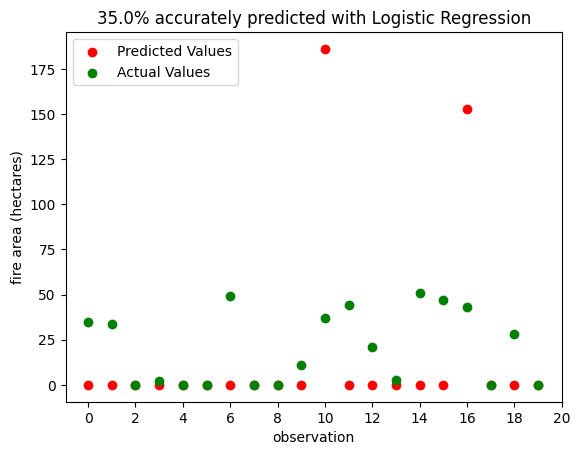

In [ ]:
vizualization_subsetX = X_test_portugal[selected_features_portugal][0:20]
actualVals = y_test_transformed[0:20]

predictedVals = LogR_portugal_selected.predict(vizualization_subsetX)

plt.scatter(x = np.arange(actualVals.size),y = predictedVals, c = "red", label = "Predicted Values")
plt.scatter(x = np.arange(actualVals.size), y = actualVals, c = "green", label = "Actual Values")
plt.ylabel("fire area (hectares)")
plt.xlabel("observation")
plt.xticks(np.arange(0, 21, 2.0))
plt.legend(loc="upper left")
plt.title(f"{LogR_portugal_selected.score(vizualization_subsetX,actualVals) * 100 }% accurately predicted with Logistic Regression")

Let's repeat the same process but using our next best-performing model, the SVC trained on features selected with ridge regression.

Text(0.5, 1.0, '35.0% accurately predicted with SVC')

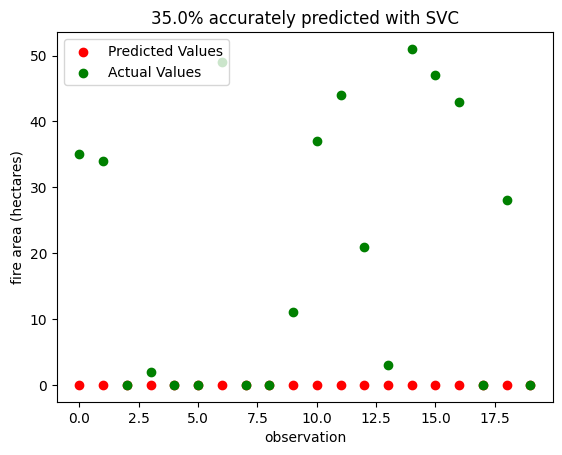

In [ ]:
svc_predictedVals = SVC_portugal_selected.predict(vizualization_subsetX)

plt.scatter(x = np.arange(actualVals.size),y = svc_predictedVals, c = "red",label = "Predicted Values")
plt.scatter(x = np.arange(actualVals.size), y = actualVals, c = "green",label = "Actual Values")
plt.ylabel("fire area (hectares)")
plt.xlabel("observation")
plt.legend(loc="upper left")
plt.title(f"{SVC_portugal_selected.score(vizualization_subsetX,actualVals) * 100}% accurately predicted with SVC")